In [ ]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.compose import ColumnTransformer

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
import joblib


In [68]:
import matplotlib as plt

In [ ]:
#Load Dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\train_and_test2.csv")

In [13]:
print(df.head())

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [15]:
print(df.tail())

      Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  \
1304       0  ...        0        0        0       3        0        0   
1305       0  ...        0        0        0       1        0        0   
1306       0  ...        0        0        0       3        0        0   
1307       0  ...        0        0        0       3        0        0   
1308       0  ...        0        0        0       3        0        0   

      Embarked  zero.17  zero.18  2urvived  
1304       2.0        0        0   

In [17]:
#target and Features
y = df["2urvived"]
X = df.drop("2urvived", axis=1)

In [18]:
#identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [19]:
print("Numeric columns:", list(numeric_features))


Numeric columns: ['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18']


In [20]:
print("Categorical columns:", list(categorical_features))

Categorical columns: []


In [21]:
#processing Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [22]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [23]:
#combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [24]:
#Full pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])


In [25]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Grid search Setup
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [4, 6, 8, None],
    'clf__min_samples_split': [2, 5, 10]
}

In [27]:
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [28]:
#Fit Model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'clf__max_depth': [4, 6, ...], 'clf__min_samples_split': [2, 5, ...], 'clf__n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [29]:
#Evaluate
best_model = grid_search.best_estimator_

In [30]:
y_pred = best_model.predict(X_test)

In [31]:
print("\n Best Parameters:", grid_search.best_params_)


 Best Parameters: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}


In [32]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8893129770992366


In [33]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       194
           1       0.85      0.69      0.76        68

    accuracy                           0.89       262
   macro avg       0.88      0.82      0.85       262
weighted avg       0.89      0.89      0.89       262



In [34]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[186   8]
 [ 21  47]]


In [35]:
#Save model and results
joblib.dump(best_model, "best_model.joblib")

['best_model.joblib']

In [36]:
results_df = pd.DataFrame(grid_search.cv_results_)

In [37]:
results_df.to_csv("grid_results.csv", index=False)

In [38]:
print("\n Saved: best_model.joblib and grid_results.csv")


 Saved: best_model.joblib and grid_results.csv


In [53]:
#featureimportance(for safe version)
preprocessor_fitted = best_model.named_steps['preprocessor']

In [54]:
#numeric feature names
feature_names_num = preprocessor_fitted.transformers_[0][2]

In [71]:
#Access fitted OneHotEncoder
cat_encoder = preprocessor_fitted.named_transformers_['cat'].named_steps['encoder']

In [72]:
# Safety check: if encoder not fitted, fit it temporarily
if not hasattr(cat_encoder, 'categories_'):
    print("Encoder not fitted — fitting manually on training data...")
    X_cat = X_train[preprocessor_fitted.transformers_[1][2]]
    cat_encoder.fit(X_cat)

In [73]:
# Get categorical feature names
feature_names_cat = cat_encoder.get_feature_names_out(
    preprocessor_fitted.transformers_[1][2]
)

In [74]:
# Combine all feature names
feature_names_all = np.concatenate([feature_names_num, feature_names_cat])

In [75]:
print("Feature names extracted successfully!")

Feature names extracted successfully!


In [76]:
print("Total:", len(feature_names_all))

Total: 27


In [77]:
print("Sample:", feature_names_all[:10])

Sample: ['Passengerid' 'Age' 'Fare' 'Sex' 'sibsp' 'zero' 'zero.1' 'zero.2'
 'zero.3' 'zero.4']


In [78]:
#Access trained RandomForest model
rf = best_model.named_steps['clf']

In [81]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [82]:
# Limit to top N for readability
top_n = 15
top_features = [feature_names_all[i] for i in indices[:top_n]]
top_importances = importances[indices[:top_n]]

In [87]:
# Plot
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 15 artists>

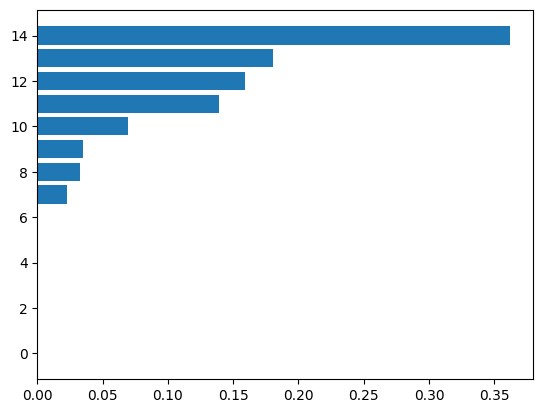

In [88]:
plt.barh(range(top_n), top_importances[::-1])

([<matplotlib.axis.YTick at 0x23821b242d0>,
 [Text(0, 0, 'zero.13'),
  Text(0, 1, 'zero.12'),
  Text(0, 2, 'zero.11'),
  Text(0, 3, 'zero.10'),
  Text(0, 4, 'zero.18'),
  Text(0, 5, 'zero.17'),
  Text(0, 6, 'zero.16'),
  Text(0, 7, 'Embarked'),
  Text(0, 8, 'sibsp'),
  Text(0, 9, 'Parch'),
  Text(0, 10, 'Pclass'),
  Text(0, 11, 'Age'),
  Text(0, 12, 'Fare'),
  Text(0, 13, 'Sex'),
  Text(0, 14, 'Passengerid')])

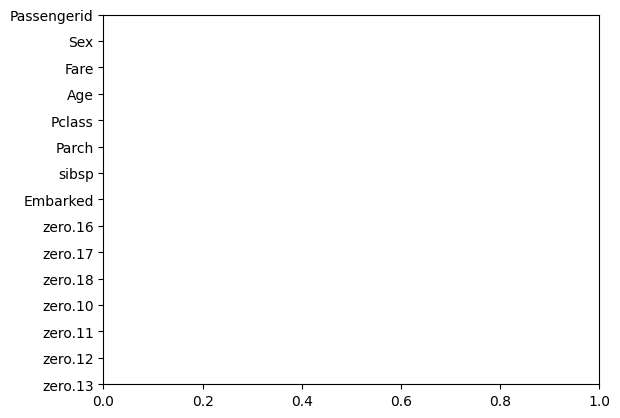

In [89]:
plt.yticks(range(top_n), top_features[::-1])

Text(0.5, 0, 'Feature Importance')

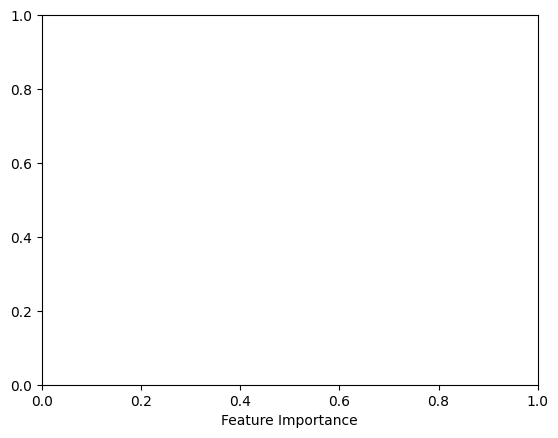

In [90]:
plt.xlabel("Feature Importance")

Text(0.5, 1.0, 'Top 15 Feature Importances (RandomForestClassifier)')

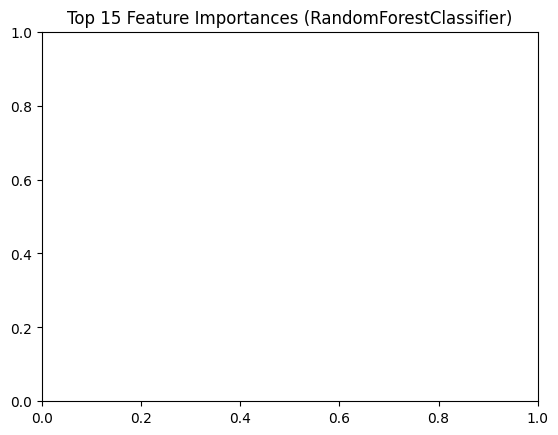

In [91]:
plt.title("Top 15 Feature Importances (RandomForestClassifier)")

In [92]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [93]:
plt.show()

In [94]:
print("Feature importance plot generated successfully")

Feature importance plot generated successfully
